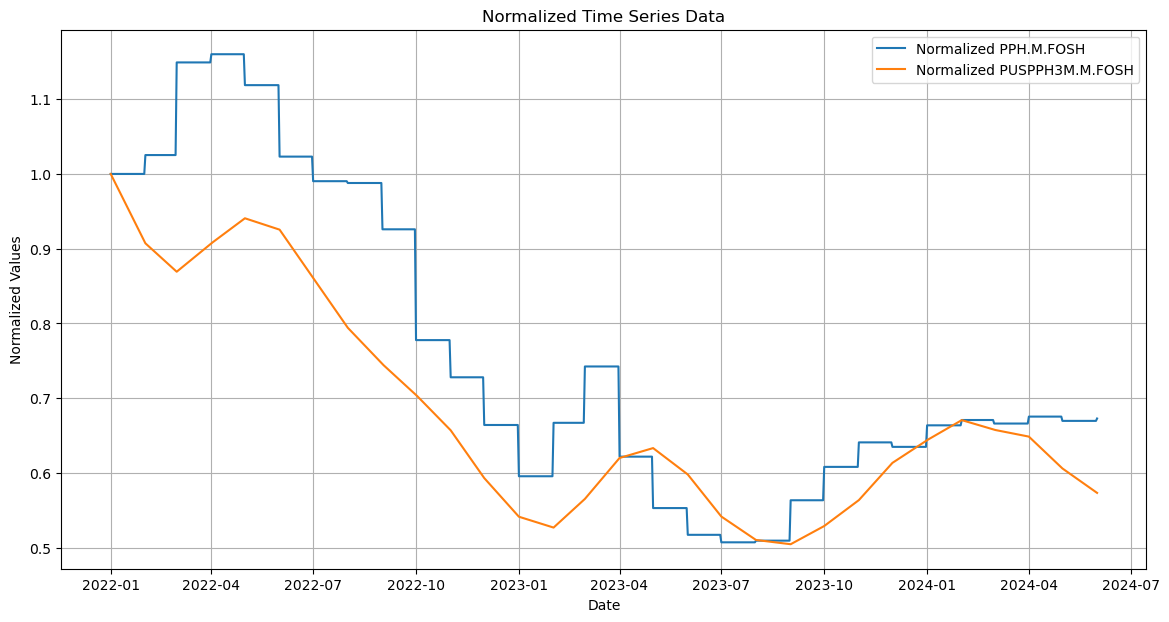

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths
file_a = r'C:\Users\ardas\Downloads\Normal\a.xlsx'
file_b = r'C:\Users\ardas\Downloads\Normal\b.xlsx'
output_file = r'C:\Users\ardas\Downloads\Normal\normalized_data.xlsx'

# Read the data
df_a = pd.read_excel(file_a, parse_dates=True, index_col=0)
df_b = pd.read_excel(file_b, parse_dates=True, index_col=0)

# Get the column names
col_a = df_a.columns[0]
col_b = df_b.columns[0]

# Determine the frequency of the time series data
freq_a = pd.infer_freq(df_a.index)
freq_b = pd.infer_freq(df_b.index)

# Resample the data to the same frequency
if freq_a == freq_b:
    # If frequencies are the same, no resampling needed
    df_a_resampled = df_a
    df_b_resampled = df_b
else:
    # Define the target frequency based on the given conditions
    if 'D' in [freq_a, freq_b]:
        target_freq = 'D'
    elif 'W' in [freq_a, freq_b]:
        target_freq = 'W'
    elif 'M' in [freq_a, freq_b]:
        target_freq = 'M'
    else:
        target_freq = 'A'

    df_a_resampled = df_a.resample(target_freq).mean()
    df_b_resampled = df_b.resample(target_freq).mean()

# Interpolate missing values to ensure sufficient data points
df_a_resampled = df_a_resampled.interpolate()
df_b_resampled = df_b_resampled.interpolate()

# Merge the data
merged_df = pd.merge(df_a_resampled, df_b_resampled, left_index=True, right_index=True, suffixes=('_a', '_b'))

# Find the first occurrence where both columns have non-null values
non_null_mask = merged_df[col_a].notnull() & merged_df[col_b].notnull()
first_occurrence = merged_df[non_null_mask].index[0]

# Get the values at this row
at = merged_df.loc[first_occurrence, col_a]
bt = merged_df.loc[first_occurrence, col_b]

# Normalize the data
normalized_a = merged_df[col_a] / at
normalized_b = merged_df[col_b] / bt

# Create the resulting DataFrame
result_df = pd.DataFrame({
    'Date': merged_df.index,
    col_a: normalized_a,
    col_b: normalized_b
}).set_index('Date')

# Store the results in a separate file
result_df.to_excel(output_file)

# Plot the result as a time series
plt.figure(figsize=(14, 7))
plt.plot(result_df.index, result_df[col_a], label=f'Normalized {col_a}')
plt.plot(result_df.index, result_df[col_b], label=f'Normalized {col_b}')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.title('Normalized Time Series Data')
plt.legend()
plt.grid(True)
plt.show()
